In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import h5py
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd
from data_analysis_codes.tools import NumMethods

In [2]:
paramA = RRead.read_parameters('pflrw_d3e2_L1206_t1_N128_EdS')
fA = pd.read_table(paramA['datapath']+'h5_data.csv', delimiter=',')
fAc = pd.read_table(paramA['datapath']+'constraints.csv', delimiter=',')

In [3]:
param_mKn = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_nCL_mKinn')
f_mKn = pd.read_table(param_mKn['datapath']+'h5_data.csv', delimiter=',')
fc_mKn = pd.read_table(param_mKn['datapath']+'constraints.csv', delimiter=',')

In [4]:
param_afrho = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_nCL_afrho')
f_afrho = pd.read_table(param_afrho['datapath']+'h5_data.csv', delimiter=',')
fc_afrho = pd.read_table(param_afrho['datapath']+'constraints.csv', delimiter=',')

In [5]:
param_afrho2 = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_nCL_afrho2')
f_afrho2 = pd.read_table(param_afrho2['datapath']+'h5_data.csv', delimiter=',')
fc_afrho2 = pd.read_table(param_afrho2['datapath']+'constraints.csv', delimiter=',')

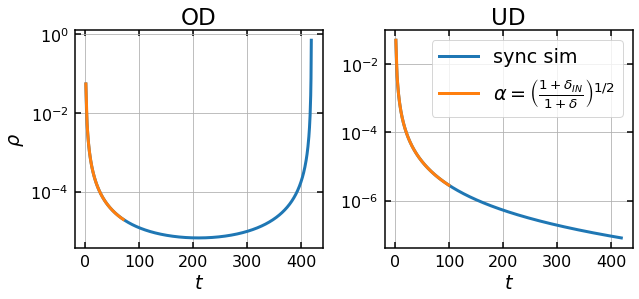

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.semilogy(fA['t'], fA['rho_OD'], label='sync sim')
plt.semilogy(f_afrho2['tau_OD'], f_afrho2['rho_u_OD'], label=r'$\alpha$')
#plt.semilogy(f_mKn1['tau_OD'], f_mKn1['rho_u_OD'])
plt.title('OD')
plt.grid()
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')

plt.subplot(122)
plt.semilogy(fA['t'], fA['rho_UD'], label='sync sim')
plt.semilogy(f_afrho2['tau_UD'], f_afrho2['rho_u_UD'], label=r'$\alpha = \left(\frac{1+\delta_{IN}}{1+\delta}\right)^{1/2}$')
#plt.semilogy(f_mKn1['tau_UD'], f_mKn1['rho_u_UD'])
plt.title('UD')
plt.grid()
plt.legend()
plt.xlabel(r'$t$')
plt.subplots_adjust(wspace=0.25)

Text(0, 0.5, '$\\alpha$')

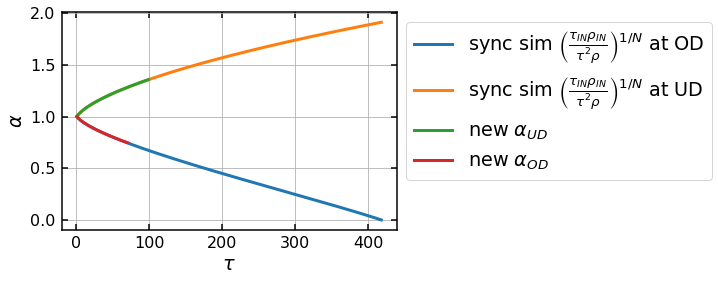

In [17]:
N = 2
plt.plot(fA['t'], (fA['rho_OD'][0]/(fA['t']*fA['t']*fA['rho_OD']))**(1/N), label=r'sync sim $\left(\frac{\tau_{IN}\rho_{IN}}{\tau^2\rho}\right)^{1/N}$ at OD')
plt.plot(fA['t'], (fA['rho_UD'][0]/(fA['t']*fA['t']*fA['rho_UD']))**(1/N), label=r'sync sim $\left(\frac{\tau_{IN}\rho_{IN}}{\tau^2\rho}\right)^{1/N}$ at UD')
plt.plot(f_afrho2['tau_UD'], f_afrho2['alpha_UD'], label=r'new $\alpha_{UD}$')
plt.plot(f_afrho2['tau_OD'], f_afrho2['alpha_OD'], label=r'new $\alpha_{OD}$')
#plt.plot(f_mKn1['tau_UD'], f_mKn1['alpha_UD'], linestyle=':', label=r'$\alpha_{UD}$')
#plt.plot(f_mKn1['tau_OD'], f_mKn1['alpha_OD'], linestyle=':', label=r'$\alpha_{OD}$')
#plt.ylim(0.3, 1.7)
#plt.xlim(-5, 200)
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\alpha$')

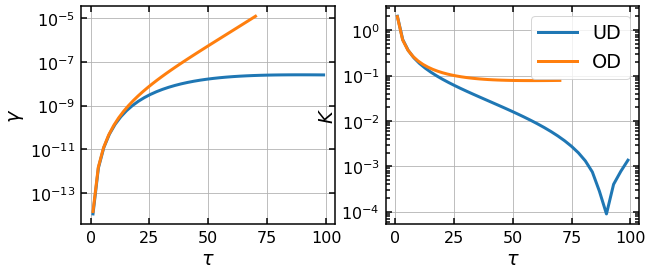

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.semilogy(f_afrho2['tau_UD'], abs(f_afrho2['gdet_UD']), label=r'$\gamma_{UD}$')
plt.semilogy(f_afrho2['tau_OD'], abs(f_afrho2['gdet_OD']), label=r'$\gamma_{OD}$')
plt.grid()
plt.ylabel(r'$|\gamma|$')
plt.xlabel(r'$\tau$')
plt.subplot(122)
plt.semilogy(f_afrho2['tau_UD'], abs(f_afrho2['K_UD']), label='UD')
plt.semilogy(f_afrho2['tau_OD'], abs(f_afrho2['K_OD']), label='OD')
plt.grid()
plt.ylabel(r'$|K|$')
plt.xlabel(r'$\tau$')
plt.legend()

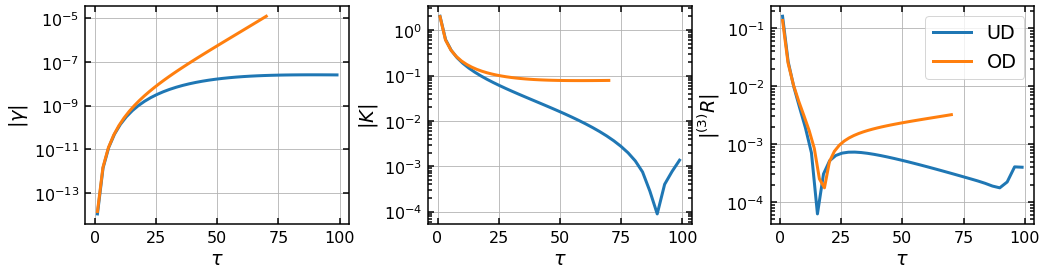

In [13]:
plt.figure(figsize=(17,4))
plt.subplot(131)
plt.semilogy(f_afrho2['tau_UD'], abs(f_afrho2['gdet_UD']), label=r'$\gamma_{UD}$')
plt.semilogy(f_afrho2['tau_OD'], abs(f_afrho2['gdet_OD']), label=r'$\gamma_{OD}$')
plt.grid()
plt.ylabel(r'$|\gamma|$')
plt.xlabel(r'$\tau$')
plt.subplot(132)
plt.semilogy(f_afrho2['tau_UD'], abs(f_afrho2['K_UD']), label='UD')
plt.semilogy(f_afrho2['tau_OD'], abs(f_afrho2['K_OD']), label='OD')
plt.grid()
plt.ylabel(r'$|K|$')
plt.xlabel(r'$\tau$')
plt.subplot(133)
plt.semilogy(f_afrho2['tau_UD'], abs(f_afrho2['RicciS_UD']), label='UD')
plt.semilogy(f_afrho2['tau_OD'], abs(f_afrho2['RicciS_OD']), label='OD')
plt.grid()
plt.ylabel(r'$|{}^{(3)}R|$')
plt.xlabel(r'$\tau$')
plt.legend()
plt.subplots_adjust(wspace=0.3)

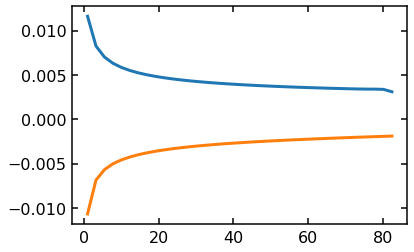

In [15]:
plt.plot(f_afrho2['t'], f_afrho2['dtalpha_UD'], label=r'new $\alpha_{UD}$')
plt.plot(f_afrho2['t'], f_afrho2['dtalpha_OD'], label=r'new $\alpha_{OD}$')

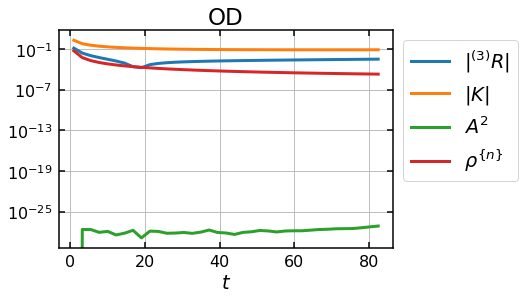

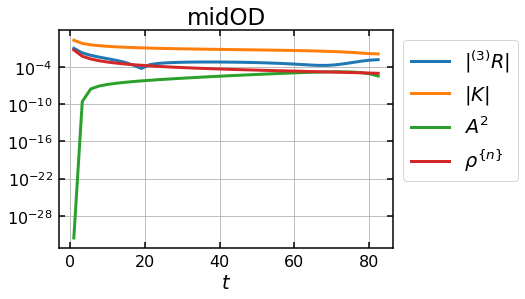

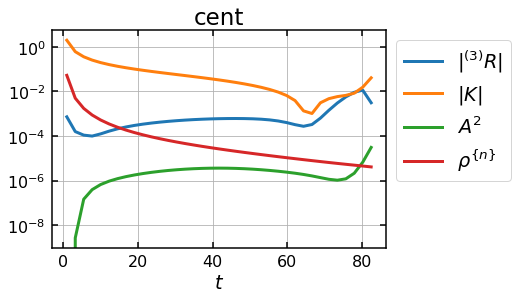

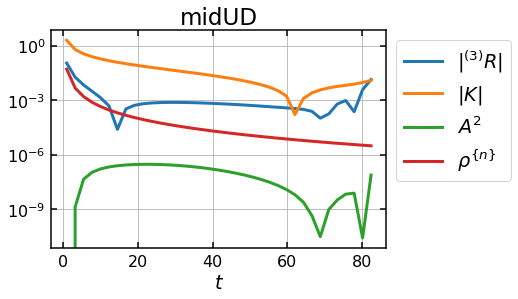

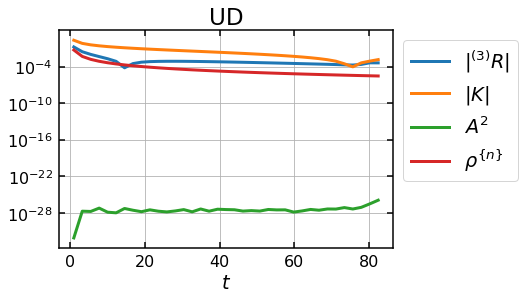

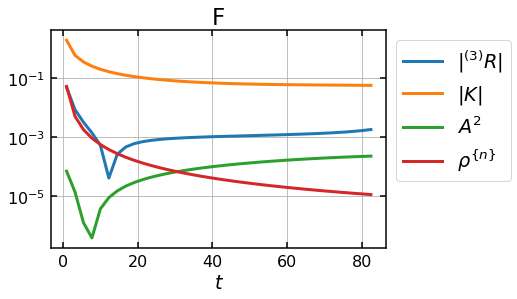

In [14]:
for loc in ['OD', 'midOD', 'cent', 'midUD', 'UD', 'F']:
    plt.figure()
    plt.semilogy(f_afrho2['t'], abs(f_afrho2['RicciS_'+loc]), label=r'$|{}^{(3)}R|$')
    plt.semilogy(f_afrho2['t'], abs(f_afrho2['K_'+loc]), label=r'$|K|$')
    plt.semilogy(f_afrho2['t'], abs(f_afrho2['A2_'+loc]), label=r'$A^2$')
    plt.semilogy(f_afrho2['t'], f_afrho2['rho_n_'+loc], label=r'$\rho^{\{n\}}$')
    plt.title(loc)
    plt.legend(bbox_to_anchor=(1,1))
    plt.grid()
    plt.xlabel(r'$t$')

Text(0.5, 0, 't')

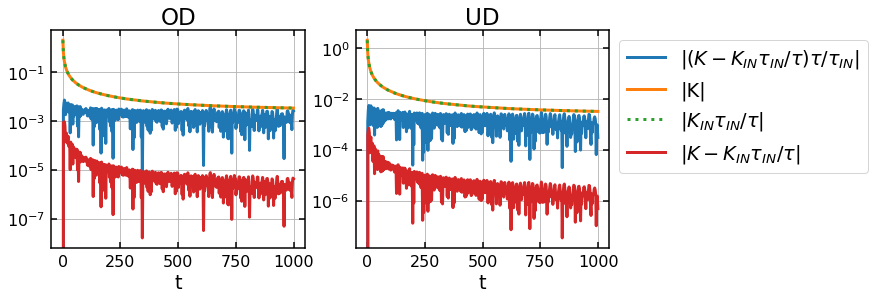

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.semilogy(f_mKn['t'], abs(f_mKn['K_OD'] - f_mKn['K_OD'][0]/f_mKn['tau_OD'])*(f_mKn['tau_OD']))
plt.semilogy(f_mKn['t'], abs(f_mKn['K_OD']))
plt.semilogy(f_mKn['t'], abs(f_mKn['K_OD'][0]/f_mKn['tau_OD']), linestyle=':')
plt.semilogy(f_mKn['t'], abs(f_mKn['K_OD'] - f_mKn['K_OD'][0]/f_mKn['tau_OD']))
plt.grid()
plt.title('OD')
plt.xlabel('t')
plt.subplot(122)
plt.semilogy(f_mKn['t'], abs(f_mKn['K_UD'] - f_mKn['K_UD'][0]/f_mKn['tau_UD'])*f_mKn['tau_UD'], label=r'$|(K - K_{IN}\tau_{IN}/\tau)\tau/\tau_{IN}|$')
plt.semilogy(f_mKn['t'], abs(f_mKn['K_UD']), label='|K|')
plt.semilogy(f_mKn['t'], abs(f_mKn['K_UD'][0]/f_mKn['tau_UD']), linestyle=':', label=r'$|K_{IN}\tau_{IN}/\tau|$')
plt.semilogy(f_mKn['t'], abs(f_mKn['K_UD'] - f_mKn['K_UD'][0]/f_mKn['tau_UD']), label=r'$|K - K_{IN}\tau_{IN}/\tau|$')
plt.grid()
plt.title('UD')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('t')

In [ ]:
N = 2
#plt.plot(fA['t'], (fA['rho_OD'][0]/(fA['t']*fA['t']*fA['rho_OD']))**(1/N), label=r'$(\tau_{IN}\rho_{IN}/\tau\rho)^{1/N}$ at OD')
#plt.plot(fA['t'], (fA['rho_UD'][0]/(fA['t']*fA['t']*fA['rho_UD']))**(1/N), label=r'$(\tau_{IN}\rho_{IN}/\tau\rho)^{1/N}$ at UD')
plt.plot(f_mKn['tau_UD'], f_mKn['alpha_UD'], label='UD')
plt.plot(f_mKn['tau_OD'], f_mKn['alpha_OD'], label='OD')
#plt.plot(f_mKn1['tau_UD'], f_mKn1['alpha_UD'], linestyle=':', label=r'$\alpha_{UD}$')
#plt.plot(f_mKn1['tau_OD'], f_mKn1['alpha_OD'], linestyle=':', label=r'$\alpha_{OD}$')
#plt.ylim(0.3, 1.7)
#plt.xlim(-5, 200)
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('t')
plt.ylabel(r'$\alpha$')

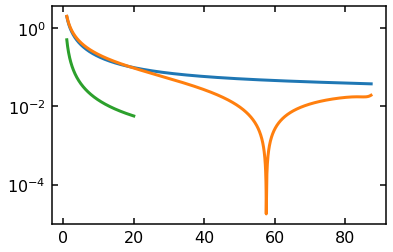

In [8]:
plt.semilogy(f_mKn['t'], abs(f_mKn['dtalpha_OD']))
plt.semilogy(f_mKn['t'], abs(f_mKn['dtalpha_UD']))
plt.semilogy(f_mKn1['t'], abs(f_mKn1['dtalpha_OD']))
#plt.semilogy(f_mKn1['t'], abs(f_mKn1['dtalpha_UD']))

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel/pylab/backend_inline.py:181: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


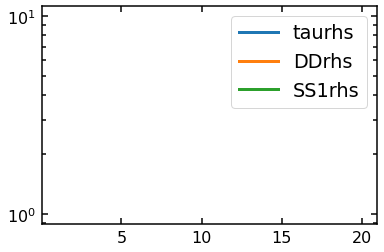

In [17]:
for var in ['taurhs', 'DDrhs', 'SS1rhs']:
    plt.semilogy(f_mKn1['t'], abs(f_mKn1[var+'_midOD']), label=var)
plt.legend(bbox_to_anchor=(1,1))

In [7]:
loc = 'midOD'
dtguxx = - 2 * f_mKn1['alpha_'+loc] * f_mKn1['Kuxx_'+loc]
dtguxy = - 2 * f_mKn1['alpha_'+loc] * f_mKn1['Kuxy_'+loc]
dtguxz = - 2 * f_mKn1['alpha_'+loc] * f_mKn1['Kuxz_'+loc]
dtguyy = - 2 * f_mKn1['alpha_'+loc] * f_mKn1['Kuyy_'+loc]
dtguyz = - 2 * f_mKn1['alpha_'+loc] * f_mKn1['Kuyz_'+loc]
dtguzz = - 2 * f_mKn1['alpha_'+loc] * f_mKn1['Kuzz_'+loc]
dtgSS = (dtguxx*f_mKn1['SS1_'+loc]*f_mKn1['SS1_'+loc] + 2 * dtguxy*f_mKn1['SS1_'+loc]*f_mKn1['SS2_'+loc] + 2 * dtguxz*f_mKn1['SS1_'+loc]*f_mKn1['SS3_'+loc]
         + dtguyy*f_mKn1['SS2_'+loc]*f_mKn1['SS2_'+loc] + 2 * dtguyz*f_mKn1['SS2_'+loc]*f_mKn1['SS3_'+loc] + dtguzz*f_mKn1['SS3_'+loc]*f_mKn1['SS3_'+loc])

F = f_mKn1['DD_'+loc]**2 + (f_mKn1['guxx_'+loc]*f_mKn1['SS1_'+loc]*f_mKn1['SS1_'+loc] + 2 * f_mKn1['guxy_'+loc]*f_mKn1['SS1_'+loc]*f_mKn1['SS2_'+loc] 
                            + 2 * f_mKn1['guxz_'+loc]*f_mKn1['SS1_'+loc]*f_mKn1['SS3_'+loc] + f_mKn1['guyy_'+loc]*f_mKn1['SS2_'+loc]*f_mKn1['SS2_'+loc] 
                            + 2 * f_mKn1['guyz_'+loc]*f_mKn1['SS2_'+loc]*f_mKn1['SS3_'+loc] + f_mKn1['guzz_'+loc]*f_mKn1['SS3_'+loc]*f_mKn1['SS3_'+loc])

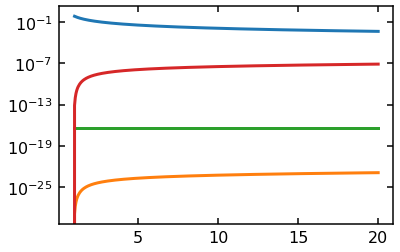

In [14]:
plt.semilogy(f_mKn1['t'], abs(f_mKn1['dtalpha_'+loc]))
plt.semilogy(f_mKn1['t'], abs(dtgSS))
plt.semilogy(f_mKn1['t'], abs(F))
plt.semilogy(f_mKn1['t'], abs(dtgSS/(4*F)))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


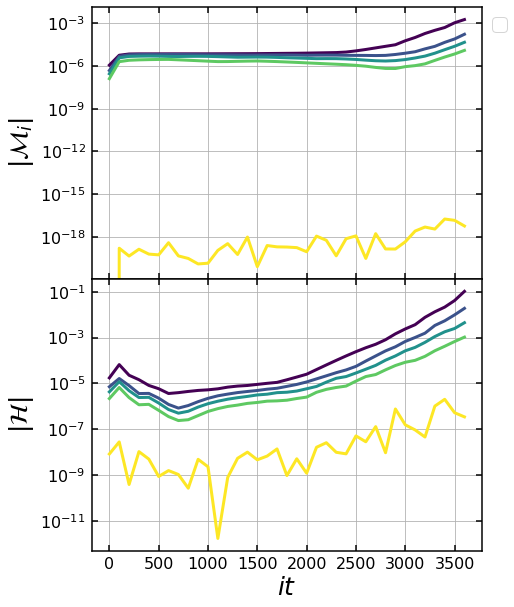

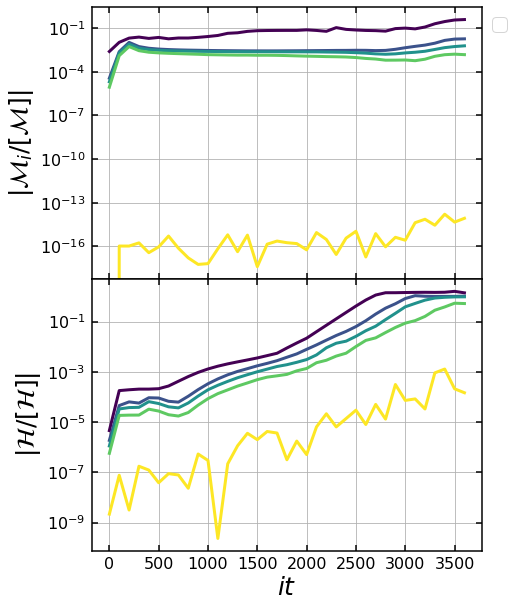

In [6]:
RRead.plot_constraints(fc_afrho2)
RRead.plot_constraintsEScale(fc_afrho2)

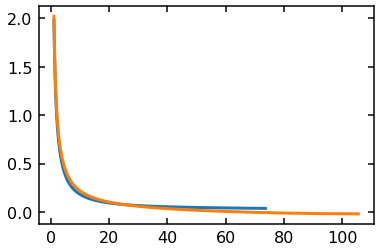

In [12]:
plt.plot(f_mKn['tau_OD'], f_mKn['dtalpha_OD'])
plt.plot(f_mKn['tau_UD'], f_mKn['dtalpha_UD'])

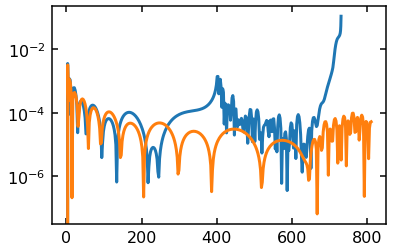

In [29]:
plt.semilogy(f_mKn['tau_OD'], abs(f_mKn['K_OD'] - f_mKn['K_OD'][0]/f_mKn['tau_OD']))
plt.semilogy(f_mKn['tau_UD'], abs(f_mKn['K_UD'] - f_mKn['K_UD'][0]/f_mKn['tau_UD']))

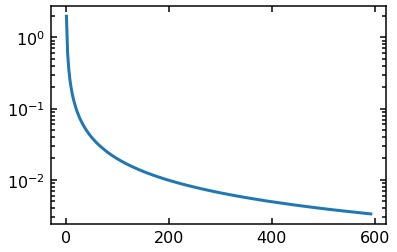

In [35]:
plt.semilogy(f_mKn['tau_OD'], abs(f_mKn['K_OD']))

In [18]:
def get_1ddata(f, param, name, key, it):
    fkey = name + '::{} it={} tl=0'.format(key, it)
    fkey = fkey + ' rl={}'.format(param['max_refinement_levels'] - 1)
    data = RRead.fixij(f[fkey])
    data = RRead.cut0(data, param['ghost_size'], param['Nx'])
    return data

In [16]:
def plotrho(it, c, p, CTD=True):
    f = h5py.File('{}_it_{:06d}.hdf5'.format(p['h5datapath']+p['simname'], it), 'r')
    if CTD:
        rho = get_1ddata(f, p, 'CT_DUST', 'rho', it)
    else:
        rho = get_1ddata(f, p, 'HYDROBASE', 'rho', it)
    makeplot(rho, c, p)
    
def plotalpha(it, c, p):
    f = h5py.File('{}_it_{:06d}.hdf5'.format(p['h5datapath']+p['simname'], it), 'r')
    rho = get_1ddata(f, p, 'ADMBASE', 'alp', it)
    makeplot(rho, c, p, log=False)
    
def plotbeta(it, c, p):
    f = h5py.File('{}_it_{:06d}.hdf5'.format(p['h5datapath']+p['simname'], it), 'r')
    rho = abs(get_1ddata(f, p, 'ADMBASE', 'betax', it))
    makeplot(rho, c, p)
    
def plotu(it, c, p, CTD=True):
    f = h5py.File('{}_it_{:06d}.hdf5'.format(p['h5datapath']+p['simname'], it), 'r')
    if CTD:
        makeplot(abs(get_1ddata(f, p, 'CT_DUST', 'u1', it)), c, p)
    else:
        gij_keys = ['ADMBASE::{} it={} tl=0 rl={}'.format(gij, it, p['max_refinement_levels']-1) for gij in 
                    ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']]
        metric, gdown_full = RRead.read_xyz(f, gij_keys)
        gdown = RRead.cut2(gdown_full, p['ghost_size'], p['Nx'])
        W = get_1ddata(f, p, 'HYDROBASE', 'w_lorentz', it)
        alpha = get_1ddata(f, p, 'ADMBASE', 'alp', it)
        u0up = W / alpha
        u1up = W * get_1ddata(f, p, 'HYDROBASE', 'vel[0]', it)
        u2up = W * get_1ddata(f, p, 'HYDROBASE', 'vel[1]', it)
        u3up = W * get_1ddata(f, p, 'HYDROBASE', 'vel[2]', it)
        uup4 = np.array([u0up, u1up, u2up, u3up])
        Box0 = np.zeros((p['Nx'], p['Ny'], p['Nz']))
        g4down4 = np.array([[-alpha**2, Box0, Box0, Box0],
                               [Box0, gdown[0,0], gdown[0,1], gdown[0,2]],
                               [Box0, gdown[1,0], gdown[1,1], gdown[1,2]],
                               [Box0, gdown[2,0], gdown[2,1], gdown[2,2]]])
        udown4 = np.einsum('ab...,b...->a...', g4down4, uup4)
        makeplot(abs(udown4[1]), c, p)
    
def makeplot(data, c, p, log=True):
    coor = np.linspace(-0.5*np.sqrt(2), 0.5*np.sqrt(2), p['Nx'])
    rhoxd = np.array([data[j, j, j] for j in range(p['Nx'])])
    if log:
        plt.semilogy(coor, rhoxd, color = c)
    else:
        plt.plot(coor, rhoxd, color = c)

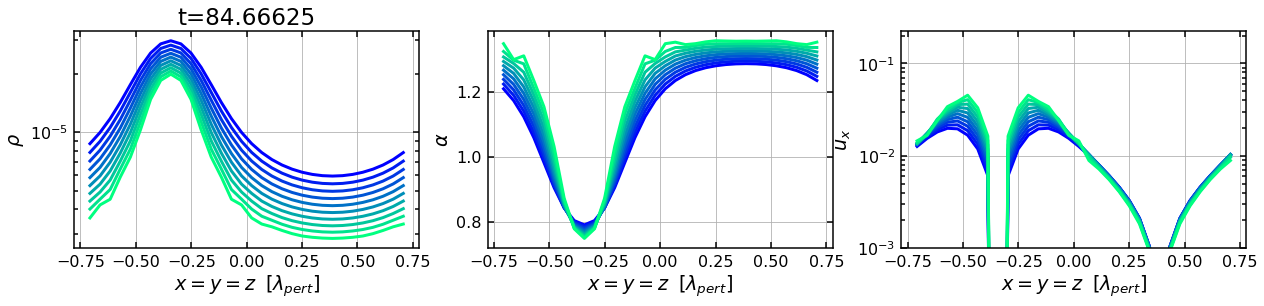

In [31]:
param = param_afrho2
fa = f_afrho2

nlen = 10
itin = 4700-nlen*100
it = itin
colors = plt.cm.winter(np.linspace(0, 1, nlen))
while it < itin + int(nlen)*100:
    plt.figure(figsize=(21, 4))
    plt.subplot(131)
    for i in range(nlen):
        plotrho(it+(i-nlen)*100, colors[i], param)
    plt.ylabel(r'$\rho$')
    plt.xlabel(r'$x=y=z \;\; [\lambda_{pert}]$')
    plt.title('t='+str(fa['t'][int(it/param['IOHDF5::out_every'])]))
    plt.grid()
    
    plt.subplot(132)
    for i in range(nlen):
        plotalpha(it+(i-nlen)*100, colors[i], param)
    plt.ylabel(r'$\alpha$')
    plt.xlabel(r'$x=y=z \;\; [\lambda_{pert}]$')
    plt.grid()
    
    plt.subplot(133)
    for i in range(nlen):
        plotu(it+(i-nlen)*100, colors[i], param)
    left, right = plt.ylim()
    plt.ylim(1e-3, right)
    plt.ylabel(r'$u_x$')
    plt.xlabel(r'$x=y=z \;\; [\lambda_{pert}]$')
    plt.grid()
    
    it += int(nlen)*100
#plt.legend(bbox_to_anchor=(1,1))